In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df_cleaned = pd.read_csv('Chicago_Public_Schools_-_Progress_Report_Cards__2011-2012_cleaned.csv')

In [5]:
df.columns = df.columns.str.strip()

### Scatter Plot: Environment Score vs. Rate of Misconducts

There appears to be a correlation between environment score and rate of student misconducts. As environment scores improve, the rate of student misconducts tends to decrease. This suggests that a more positive and supportive school environment may be associated with fewer disciplinary incidents.

* The dataset is filtered to include only `Environment Score` and `Rate of Misconducts (per 100 students)`.
* `sns.scatterplot()` is used to create a scatter plot showing the relationship between these two variables.
* `plt.grid()`, `plt.title()`, and `plt.tight_layout()` are used for formatting.


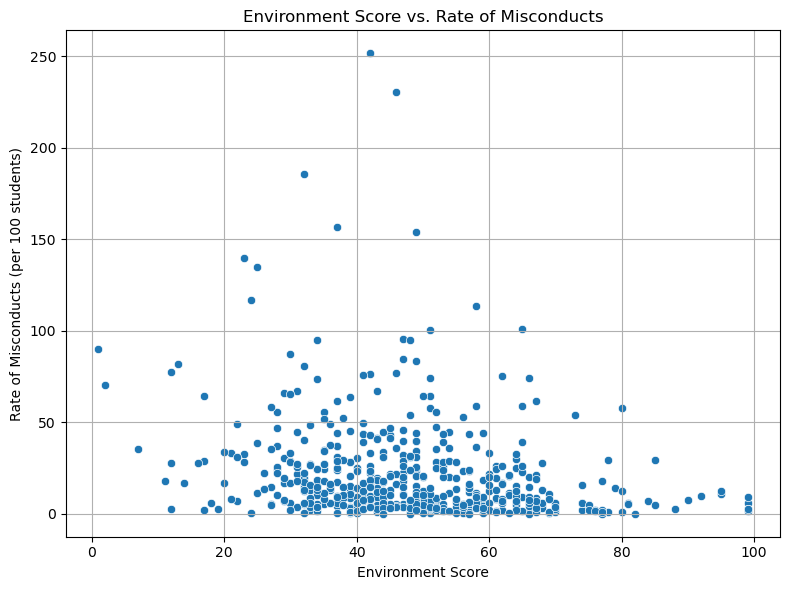

<Figure size 640x480 with 0 Axes>

In [89]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='Environment Score',
    y='Rate of Misconducts (per 100 students)'
)
plt.title('Environment Score vs. Rate of Misconducts')
plt.xlabel('Environment Score')
plt.ylabel('Rate of Misconducts (per 100 students)')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.savefig("environment_vs_misconducts.png", dpi=300, bbox_inches='tight')


### Boxplot: Distribution of Safety Scores

This boxplot shows the distribution of safety scores across all Chicago Public Schools in the dataset. The interquartile range shows most safety scores fall between 30 and 60. A few schools have significantly higher or lower safety scores, represented as outliers.

The plot reveals variability in perceived or measured safety among schools, with a majority falling into a mid-range and only a few schools showing extremely high or low safety ratings.

* `plt.figure()` sets the figure size.
* `sns.boxplot()` creates a boxplot for the `Safety Score` column.
* `plt.title()`, `plt.ylabel()`, and `plt.grid()` add labels and a title.


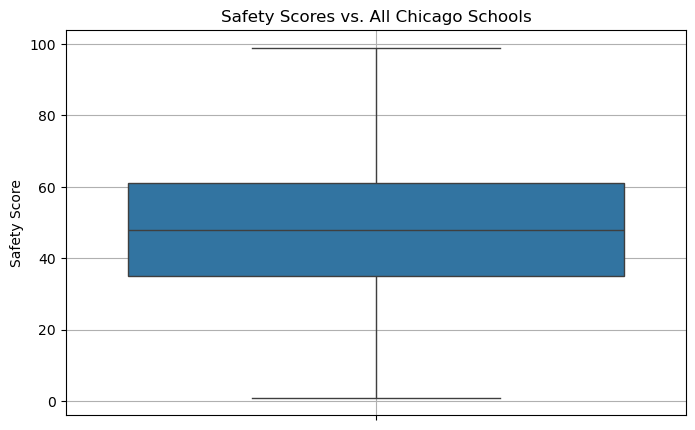

<Figure size 640x480 with 0 Axes>

In [47]:
plt.figure(figsize=(8, 5))
sns.boxplot(y='Safety Score', data=df)
plt.title('Safety Scores vs. All Chicago Schools')
plt.ylabel('Safety Score')
plt.grid(True)
plt.show()
plt.savefig("safety_scores_vs_Chicago_schools.png", dpi=300, bbox_inches='tight')

### Bar Chart: Number of Schools by Type

The school type column is plotted to show how many elementary, middle, and high schools exist.

Elementary schools dominate the dataset. 
 
* `sns.countplot()` automatically counts the number of occurrences for each category in the `Elementary, Middle, or High School` column.
* `plt.title()`, `plt.ylabel()`, and `plt.grid()` add labels and a title.
* `plt.grid(True)` adds grid lines.

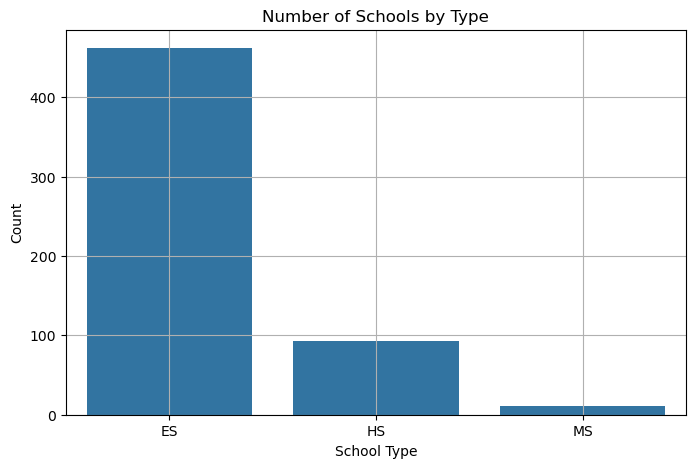

<Figure size 640x480 with 0 Axes>

In [49]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Elementary, Middle, or High School', data=df)
plt.title('Number of Schools by Type')
plt.xlabel('School Type')
plt.ylabel('Count')
plt.grid(True)
plt.show()
plt.savefig("number_schools_by_type.png", dpi=300, bbox_inches='tight')

### Count Plot: Environment Score Ranges


This process turns a continuous variable into categories and shows their frequency.

Most schools fall in the 61–70 range, indicating a majority offer moderately supportive environments. Very few schools fall into the highest or lowest ends.

* `pd.cut()` segments the `Environment Score` into defined bins (e.g., 0–50, 51–60).
* A new column `Environment Score Bin` is created for these labels.
* `sns.countplot()` then counts how many schools fall into each bin.
* `plt.title()`, `plt.ylabel()`, and `plt.grid()` add labels and a title.

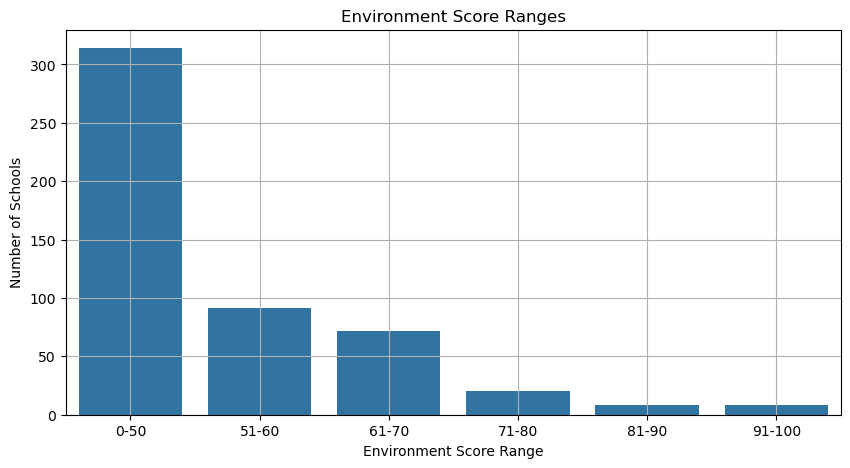

<Figure size 640x480 with 0 Axes>

In [51]:
bins = [0, 50, 60, 70, 80, 90, 100]
labels = ['0-50', '51-60', '61-70', '71-80', '81-90', '91-100']
df['Environment Score Bin'] = pd.cut(df['Environment Score'], bins=bins, labels=labels, include_lowest=True)

# Create count plot of environment score bins
plt.figure(figsize=(10, 5))
sns.countplot(x='Environment Score Bin', data=df, order=labels)
plt.title('Environment Score Ranges')
plt.xlabel('Environment Score Range')
plt.ylabel('Number of Schools')
plt.grid(True)
plt.show()
plt.savefig("Environment_score_ranges.png", dpi=300, bbox_inches='tight')

### Grouped Bar Plot: Average Safety and Environment Scores by School Type

This bar plot highlights differences in average conditions between school types.

Elementary and high schools tend to score higher on safety than middle schools, while environment scores remain fairly even. This may reflect differences in security practices or school size.

* `.groupby()` groups the data by school type.
* `.mean()` calculates the average safety and environment score for each group.
* `set_index().plot(kind='bar')` plots the grouped means side-by-side.
* Additional formatting (`plt.title()`, `plt.xticks()`, `plt.tight_layout()`) improves appearance.


<Figure size 1000x600 with 0 Axes>

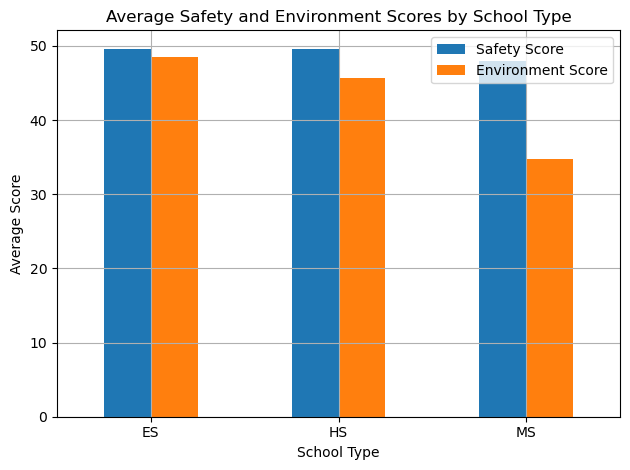

<Figure size 640x480 with 0 Axes>

In [97]:
grouped_scores = df.groupby('Elementary, Middle, or High School')[
    ['Safety Score', 'Environment Score']
].mean().reset_index()

plt.figure(figsize=(10, 6))
grouped_scores.set_index('Elementary, Middle, or High School').plot(kind='bar')
plt.title('Average Safety and Environment Scores by School Type')
plt.ylabel('Average Score')
plt.xlabel('School Type')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig("Average_safety_environment_score.png")

### Correlation Heatmap: Safety, Environment, Attendance, and Graduation Rate

This plot shows how much each variable is correlated with the others.

Safety Score and Environment Score are strongly positively correlated, suggesting that safer schools also tend to have more better environments.

Average Student Attendance is moderately related to both environment and graduation rate, showing that students are more likely to graduate when they consistently attend school and feel supported.


* A small subset of four numeric columns is selected: `Safety Score`, `Environment Score`, `Average Student Attendance`, and `Graduation Rate %`.
* Each column is converted to numeric using `pd.to_numeric(..., errors='coerce')` to ensure accurate calculations.
* Rows with missing values are dropped using `.dropna()`.
* `sns.heatmap()` is used to visualize the correlation matrix with color intensity, values annotated using `annot=True`, and formatted to two decimal places.



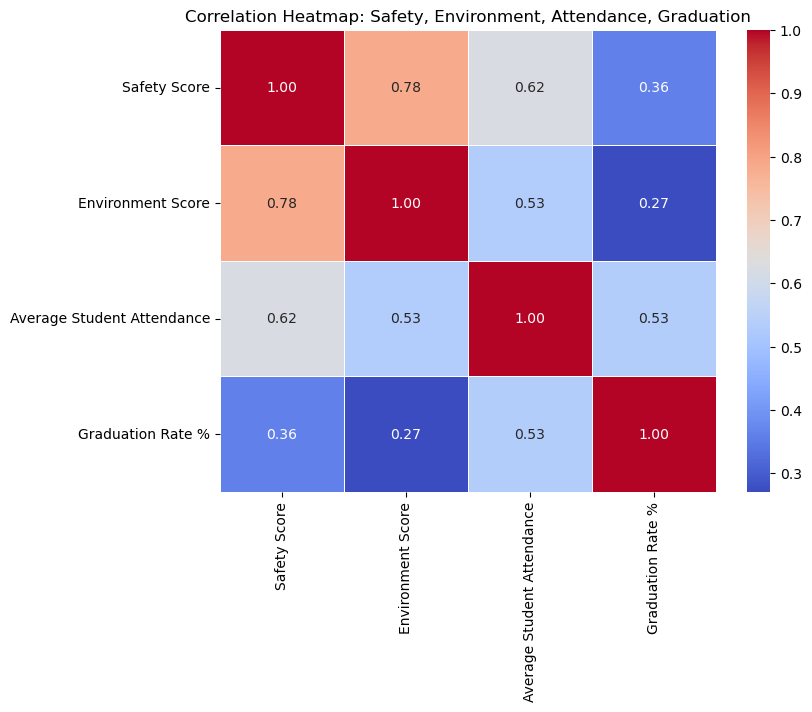

<Figure size 640x480 with 0 Axes>

In [68]:
small_subset_cols = [
    'Safety Score',
    'Environment Score',
    'Average Student Attendance',
    'Graduation Rate %'
]

for col in small_subset_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

small_subset_df = df[small_subset_cols].dropna()

plt.figure(figsize=(8, 6))
subset_corr = small_subset_df.corr()
sns.heatmap(subset_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap: Safety, Environment, Attendance, Graduation')
plt.show()
plt.savefig("heatmap.png", dpi=300, bbox_inches='tight')